In [4]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

In [5]:
raw_aeroports = pd.read_csv("aeroports.csv")
raw_compagnies = pd.read_csv("compagnies.csv")
raw_vols = pd.read_csv("vols.csv")

In [6]:
aeroports = raw_aeroports.copy()
compagnies = raw_compagnies.copy()
vols = raw_vols.copy()

## Compagnies 


In [7]:
print("Shape : ",compagnies.shape)
print("NaN = ",compagnies.isna().sum().sum())
compagnies

Shape :  (13, 2)
NaN =  1


,COMPAGNIE,CODE
0,Try Hard Airlines,THA
1,Corporate Overlord Airways,COA
2,Neverland Airlines,NaN
3,Always A Problem Flights,AAPF
4,Overpriced Air,OA
5,Morally Ambiguious Fligthts,MAF
6,Fliying Is Possible Inc.,FIPI
7,Air Piloter Sans Les Mains,APSLM
8,Ne Va Pas Partout Airlines,NVPPA
9,IE 6.0 Flights,I6F



## Aeroports 

In [13]:
print("Shape : ",aeroports.shape)
print("NaN = ",aeroports.isna().sum().sum())
aeroports.head()

Shape :  (321, 9)
NaN =  0


,CODE_IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX_RETARD_10,PRIX_RETARD_APRES
0,MCT,Muscat International Airport,Muscat,OM,58.284401,23.593300,48.0,6695,361
1,SOU,Southampton Airport,Southampton,GB,-1.356800,50.950298,44.0,1061,71
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.844002,11.546600,40.0,2402,909
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.197900,3000.0,8641,550
4,FFD,RAF Fairford,Fairford,GB,-1.790030,51.682201,286.0,6883,870


In [16]:
# Alors que tout les aéroports n'apparaissent qu'une fois. 
# Il se trouve que JNB à Johannesburg est en triple (on va faire la moyenne des prix retard)
#aeroports.groupby('CODE IATA').size().sort_values(ascending=False)
aeroports.loc[aeroports['CODE_IATA'] == 'JNB', 'NOM'] = 'OR Tambo International Airport'
aeroports = aeroports.groupby(['CODE_IATA','NOM','LIEU','PAYS']).mean().reset_index()
aeroports.head()

,CODE_IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX_RETARD_10,PRIX_RETARD_APRES
0,AAL,Aalborg Airport,Aalborg,DK,9.849243,57.092759,10.0,8346.0,353.0
1,AAP,Aji Pangeran Tumenggung Pranoto International ...,Samarinda,ID,117.249392,-0.374448,73.0,9245.0,318.0
2,ABV,Nnamdi Azikiwe International Airport,Abuja,NG,7.263170,9.006790,1123.0,6338.0,272.0
3,ACC,Kotoka International Airport,Accra,GH,-0.166786,5.605190,205.0,2880.0,955.0
4,ADB,Adnan Menderes International Airport,Ä°zmir,TR,27.157000,38.292400,412.0,2955.0,603.0


In [18]:
print(aeroports['PAYS'].nunique())
print(aeroports['CODE_IATA'].nunique())

111
319


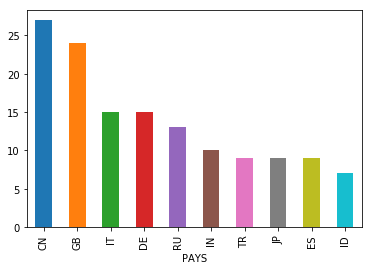

In [92]:
# Top 10 des pays ayant le plus d'airoport
aeroports.groupby('PAYS').size().sort_values(ascending=False).head(10).plot.bar()

## PRIX RETARD PREMIERE 10 MINUTES

Moyenne du prix des retards :  5173 $


,PAYS,PRIX_RETARD_10
292,IT,9877.0
160,MY,9773.0
145,UA,9757.0
128,CN,9753.0
93,UG,9744.0


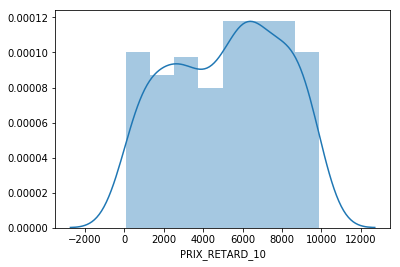

In [84]:
# top du prix des retards par pays 
print("Moyenne du prix des retards : ",int(aeroports['PRIX_RETARD_10'].mean()),"$")
sns.distplot(aeroports['PRIX_RETARD_10'])
aeroports.sort_values(by='PRIX_RETARD_10',ascending=False)[['PAYS','PRIX_RETARD_10']].head()

Moyenne du prix des retards par minutes apres 10 minutes :  502 $


,PAYS,PRIX_RETARD_APRES
55,KR,995.0
295,DE,988.0
54,KR,984.0
104,SL,982.0
225,RO,977.0


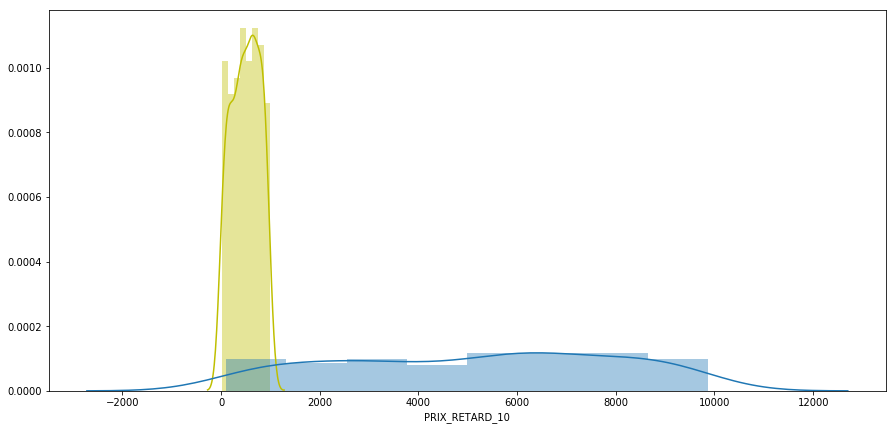

In [86]:
# top du prix des retards pour chaque minute par pays apres 10 min
print("Moyenne du prix des retards par minutes apres 10 minutes : ",int(aeroports['PRIX_RETARD_APRES'].mean()),"$")
plt.figure(figsize=(15,7))

sns.distplot(aeroports['PRIX_RETARD_APRES'],color="y")
sns.distplot(aeroports['PRIX_RETARD_10'])

aeroports.sort_values(by='PRIX_RETARD_APRES',ascending=False)[['PAYS','PRIX_RETARD_APRES']].head()


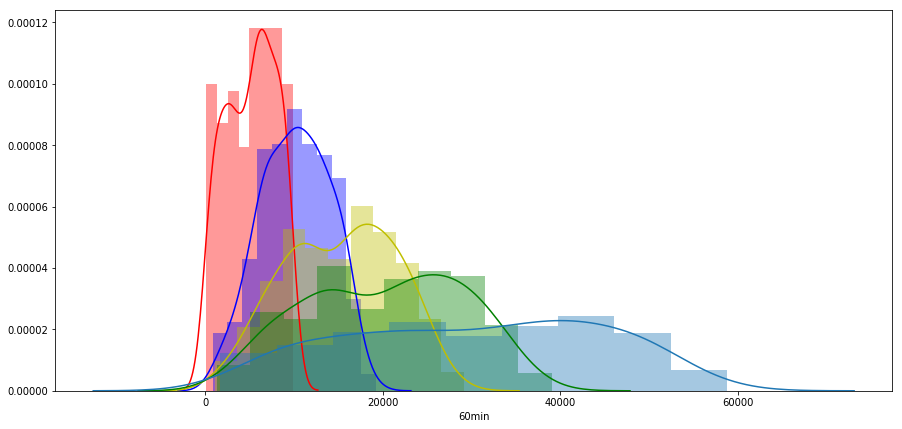

In [10]:
delay = aeroports[['CODE_IATA','PRIX RETARD PREMIERE 10 MINUTES','PRIX_RETARD_APRES']]

def delay_byTime(min_delay, first_ten, minutes_after_ten):
    if min_delay <= 10 : 
        return first_ten
    else :
        return first_ten + (min_delay - 10)*minutes_after_ten

delay['20min'] = delay.apply(lambda row : delay_byTime(20, row['PRIX RETARD PREMIERE 10 MINUTES'], row['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']), axis=1)
delay['30min'] = delay.apply(lambda row : delay_byTime(30, row['PRIX RETARD PREMIERE 10 MINUTES'], row['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']), axis=1)
delay['40min'] = delay.apply(lambda row : delay_byTime(40, row['PRIX RETARD PREMIERE 10 MINUTES'], row['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']), axis=1)
delay['60min'] = delay.apply(lambda row : delay_byTime(60, row['PRIX RETARD PREMIERE 10 MINUTES'], row['PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES']), axis=1)

plt.figure(figsize=(15,7))
sns.distplot(delay['PRIX RETARD PREMIERE 10 MINUTES'],color="r")
sns.distplot(delay['20min'],color="b")
sns.distplot(delay['30min'],color="y")
sns.distplot(delay['40min'],color="g")
sns.distplot(delay['60min'])

# l'evolution du prix des retrards semble s'étaler avec le temps. 
# Un retard prolonger va donc couter beacoup plus cher à certain aéroport plutot qu'à d'autre.
# D'une autre maniere, en fonction des raisons du retard, du coup (externe) que celui ci implique et de sa fréquence
# certain aéroport on peut etre meilleurs temps d'accepter le retard ? 

## Vols 


In [80]:
# reset vols 
vols = raw_vols.copy()

In [29]:
print(vols.shape)
vols.head()

(3000000, 30)


,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,RAISON_ANNULATION,RETARD_SYSTEM,RETARD_SECURITE,RETARD_COMPAGNIE,RETARD_AVION,RETARD_METEO,DATE,NIVEAU_SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,235.0,220.0,205.0,1520,1841.0,6.0,1835,1847.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6/1/2018,10,NaN
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219.0,-7.0,14.0,2233.0,84.0,69.0,50.0,337,2323.0,5.0,2350,2328.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9/1/2016,10,THA
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719.0,-11.0,14.0,1733.0,71.0,66.0,45.0,252,1818.0,7.0,1841,1825.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2016,10,MAF


## NaN dans les données de vols 

In [30]:
vols_na = vols.isna().sum().to_frame().rename(columns={0:"NaN"})
vols_na['NaN%'] = round(vols_na['NaN'] * 100 / vols.shape[0],1) 
vols_na[vols_na['NaN'] != 0].sort_values(by="NaN%", ascending=False)

,NaN,NaN%
RAISON_ANNULATION,2948414,98.3
RETARD_METEO,2439769,81.3
RETARD_AVION,2439769,81.3
RETARD_COMPAGNIE,2439769,81.3
RETARD_SECURITE,2439769,81.3
RETARD_SYSTEM,2439769,81.3
COMPAGNIE AERIENNE,143045,4.8
TEMPS_RETARD_ARRIVEE,59585,2.0
TEMPS_PASSE,59585,2.0
TEMPS_VOL,59585,2.0


In [33]:
vols.columns

Index(['IDENTIFIANT', 'VOL', 'CODE_AVION', 'AEROPORT_DEPART',
       'AEROPORT_ARRIVEE', 'HEURE_DEPART_PROGRAMME', 'HEURE_DEPART',
       'TEMPS_RETARD_DEPART', 'TEMPS_DEPLACEMENT_DECOLLAGE', 'HEURE_DECOLLAGE',
       'TEMPS_PROGRAMME', 'TEMPS_PASSE', 'TEMPS_VOL', 'DISTANCE',
       'HEURE_ATTERRISSAGE', 'TEMPS_DEPLACEMENT_ATTERRISSAGE',
       'HEURE_ARRIVEE_PROGRAMMEE', 'HEURE_ARRIVEE', 'TEMPS_RETARD_ARRIVEE',
       'DETOURNEMENT', 'ANNULATION', 'RAISON_ANNULATION', 'RETARD_SYSTEM',
       'RETARD_SECURITE', 'RETARD_COMPAGNIE', 'RETARD_AVION', 'RETARD_METEO',
       'DATE', 'NIVEAU_SECURITE', 'COMPAGNIE AERIENNE'],
      dtype='object')

In [37]:
# Pour la suite de l'analyse nous supprimons les NaN sur 
# HEURE DE DEPART, RETART DE DEPART, TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE et DECOLLAGE
print("Nous continueron avec  : ",round(vols[
    vols['HEURE_DEPART'].notna() & 
    vols['HEURE_DECOLLAGE'].notna() &
    vols['HEURE_ATTERRISSAGE'].notna() &
    vols['HEURE_ARRIVEE_PROGRAMMEE'].notna() &
    vols["TEMPS_RETARD_ARRIVEE"].notna() &
    vols["HEURE_ARRIVEE"].notna() ].shape[0]*100 / vols.shape[0],1),"% du dataset")
vols = vols[vols['HEURE_DEPART'].notna() & 
    vols['HEURE_DECOLLAGE'].notna() &
    vols['HEURE_ATTERRISSAGE'].notna() &
    vols['HEURE_ARRIVEE_PROGRAMMEE'].notna() &
    vols["HEURE_ARRIVEE"].notna() &
    vols["TEMPS_RETARD_ARRIVEE"].notna()        
           ]

Nous continueron avec  :  98.0 % du dataset


In [39]:
# Verification pour le merge aeroport - vols
print("AEROPORT DEPART na :",vols['AEROPORT_DEPART'].isna().sum())
print("AEROPORT ARRIVEE na : ",vols['AEROPORT_ARRIVEE'].isna().sum())
dep = vols['AEROPORT_DEPART'].unique()
arr = vols['AEROPORT_ARRIVEE'].unique()
print("La liste des aéroport de depart est elle egale à celle d'arrivé ? ", np.array_equal(set(dep),set(arr)))  
print("Nombre d'aeroports present dans vols mais pas dans airports : ",len(np.setdiff1d(dep,aeroports['CODE_IATA'].unique())))

AEROPORT DEPART na : 0
AEROPORT ARRIVEE na :  0
La liste des aéroport de depart est elle egale à celle d'arrivé ?  True
Nombre d'aeroports present dans vols mais pas dans airports :  0


Pour les heurs on à que l'heure donc si nu vol par le soir et qu'il arrive le lendemain on ne le sait pas

De meme pour les jatlags

In [40]:
vols.head(2)

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,RAISON_ANNULATION,RETARD_SYSTEM,RETARD_SECURITE,RETARD_COMPAGNIE,RETARD_AVION,RETARD_METEO,DATE,NIVEAU_SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA


In [86]:
# pour la lisibilité
def formatHour(object_serie):
    return object_serie.str[:-2].astype(str)+':'+object_serie.str[-2:].astype(str)
    
vols['DEPART_PROGRAMME'] = formatHour(vols['DEPART PROGRAMME'].astype(str))
vols['HEURE_DEPART'] = formatHour(vols['HEURE DE DEPART'].astype(int).astype(str))
vols['HEUREDECOLLAGE'] = formatHour(vols['DECOLLAGE'].astype(int).astype(str))
vols['ATTERRISSAGE'] = formatHour(vols['ATTERRISSAGE'].astype(int).astype(str))
vols['ARRIVEE PROGRAMMEE'] = formatHour(vols['ARRIVEE PROGRAMMEE'].astype(str))
vols["HEURE D'ARRIVEE"] = formatHour(vols["HEURE D'ARRIVEE"].astype(int).astype(str))
vols.head(2)

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,14:10,14:11,1.0,20.0,14:31,229.0,227.0,197.0,1749,20:48,10.0,20:59,20:58,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,14:55,14:49,-6.0,15.0,15:04,210.0,191.0,173.0,1325,18:57,3.0,19:25,19:00,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA


In [41]:
vols.head(2)

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,RAISON_ANNULATION,RETARD_SYSTEM,RETARD_SECURITE,RETARD_COMPAGNIE,RETARD_AVION,RETARD_METEO,DATE,NIVEAU_SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA


Avance ou à l'heure à l'arrivé :  63.19 %
Retard de 10 min ou moins à l'arrivé :  14.38 %
Retard de + de 10 min à l'arrivé :  22.43 %


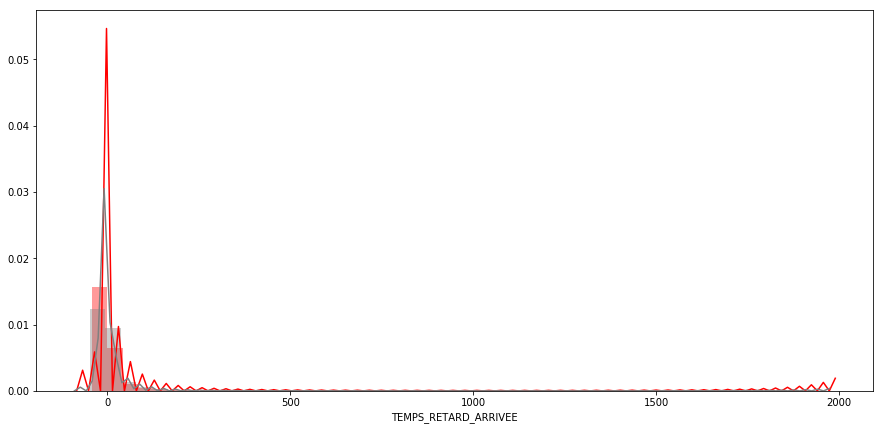

In [98]:
# RETARD A L'ARRIVEE 
print("Avance ou à l'heure à l'arrivé : ",round((vols["TEMPS_RETARD_ARRIVEE"] <= 0).sum() * 100  / vols.shape[0],2),"%")
print("Retard de 10 min ou moins à l'arrivé : ",round(((vols["TEMPS_RETARD_ARRIVEE"] <= 10) & (vols["TEMPS_RETARD_ARRIVEE"] > 0)).sum() * 100  / vols.shape[0],2),"%")
print("Retard de + de 10 min à l'arrivé : ",round((vols["TEMPS_RETARD_ARRIVEE"] > 10).sum() * 100  / vols.shape[0],2),"%")
plt.figure(figsize=(15,7))

sns.distplot(vols["TEMPS_RETARD_DEPART"],color='red')
sns.distplot(vols["TEMPS_RETARD_ARRIVEE"],color='grey')


In [93]:
# Retard à l'arrivé sachant qu'on a pas de retard au depart 
vols_avance_depart = vols[vols["RETART DE DEPART"] <= 0]
print("Parmis les vols partit dans les temps : ")
print("Avance ou à l'heure à l'arrivé : ",round((vols_avance_depart["RETARD A L'ARRIVEE"] <= 0).sum() * 100  / vols_avance_depart.shape[0],2),"%")
print("Retard de 10 min ou moins à l'arrivé : ",round(((vols_avance_depart["RETARD A L'ARRIVEE"] <= 10) & (vols_avance_depart["RETARD A L'ARRIVEE"] > 0)).sum() * 100  / vols_avance_depart.shape[0],2),"%")
print("Retard de + de 10 min à l'arrivé : ",round((vols_avance_depart["RETARD A L'ARRIVEE"] > 10).sum() * 100  / vols_avance_depart.shape[0],2),"%")
plt.figure(figsize=(15,7))
plt.title("Distribution du temps de retard des vols partit en retard")
sns.distplot(vols["RETART DE DEPART"],color='grey')
sns.distplot(vols["RETARD A L'ARRIVEE"],color='red')

KeyError: 'RETART DE DEPART'

Parmis les vols partit en retard : 
Avance ou à l'heure à l'arrivé :  27.5 %
Retard de 10 min ou moins à l'arrivé :  19.06 %
Retard de + de 10 min à l'arrivé :  53.44 %


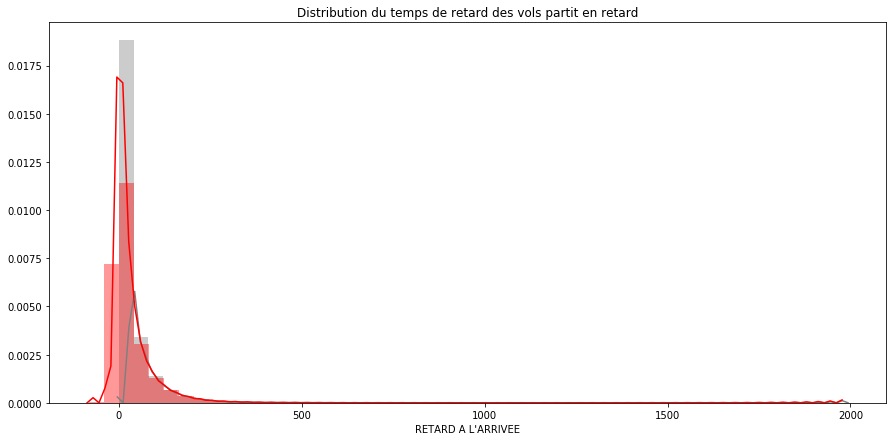

In [86]:
# Retard à l'arrivé sachant qu'on a un retard au depart 
vols_retard_depart = vols[vols["RETART DE DEPART"] > 0]
print("Parmis les vols partit en retard : ")
print("Avance ou à l'heure à l'arrivé : ",round((vols_retard_depart["RETARD A L'ARRIVEE"] <= 0).sum() * 100  / vols_retard_depart.shape[0],2),"%")
print("Retard de 10 min ou moins à l'arrivé : ",round(((vols_retard_depart["RETARD A L'ARRIVEE"] <= 10) & (vols_retard_depart["RETARD A L'ARRIVEE"] > 0)).sum() * 100  / vols_retard_depart.shape[0],2),"%")
print("Retard de + de 10 min à l'arrivé : ",round((vols_retard_depart["RETARD A L'ARRIVEE"] > 10).sum() * 100  / vols_retard_depart.shape[0],2),"%")
plt.figure(figsize=(15,7))
plt.title("Distribution du temps de retard des vols partit en retard")
sns.distplot(vols_retard_depart["RETART DE DEPART"],color='grey')
sns.distplot(vols_retard_depart["RETARD A L'ARRIVEE"],color='red')

In [9]:
print("Il semblerait finalement que l'heure n'est pas d'impacte sur les retards ... (il faudrait faire un count values en %)")
#vols[["DEPART PROGRAMME","RETART DE DEPART","RETARD A L'ARRIVEE"]].sort_values(by="RETARD A L'ARRIVEE", ascending=False).head(10)
vols[["DEPART PROGRAMME","RETART DE DEPART","RETARD A L'ARRIVEE"]].groupby("DEPART PROGRAMME").mean().sort_values(by="RETARD A L'ARRIVEE", ascending=False).head(10)

Il semblerait finalement que l'heure n'est pas d'impacte sur les retards ... (il faudrait faire un count values en %)


,RETART DE DEPART,RETARD A L'ARRIVEE
DEPART PROGRAMME,,
237,44.000000,60.000000
409,65.000000,57.000000
1,60.111111,51.000000
300,57.000000,49.000000
138,64.384615,43.307692
148,51.500000,38.100000
338,32.666667,38.000000
149,44.813953,36.767442
328,34.500000,36.500000


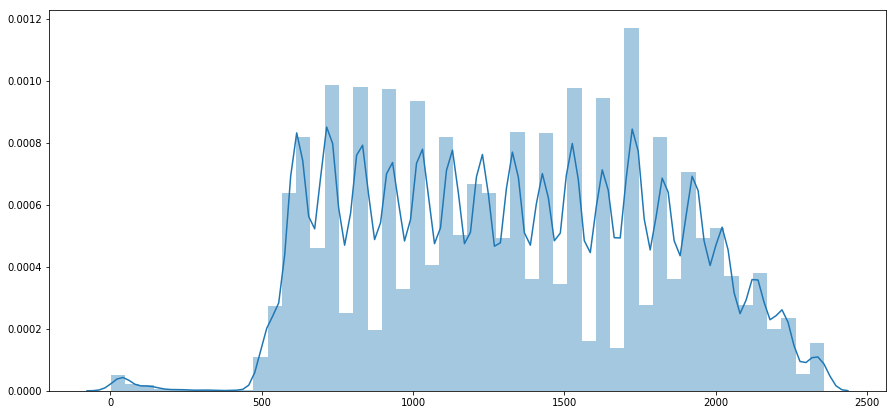

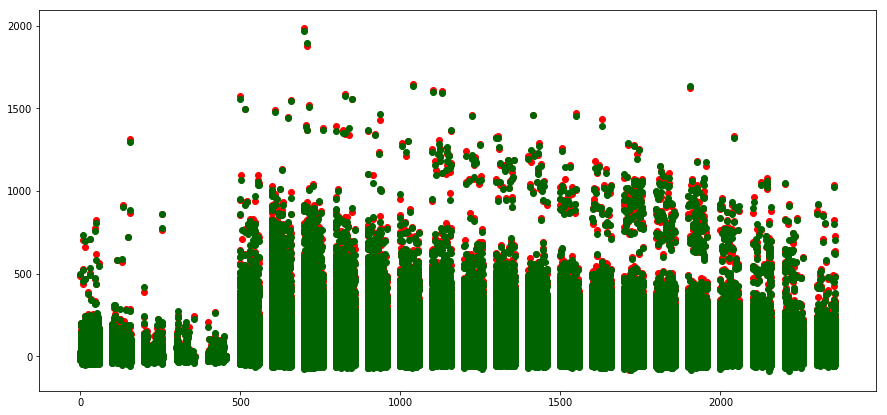

In [51]:
# Distribution des departs
plt.figure(figsize=(15,7))
sns.distplot(vols[["HEURE_DEPART_PROGRAMME"]])
#sns.distplot(vols[["RETARD A L'ARRIVEE"]])#.groupby("DEPART PROGRAMME").size()
plt.figure(figsize=(15,7))
plt.scatter(vols[["HEURE_DEPART_PROGRAMME"]], vols[["TEMPS_RETARD_DEPART"]], c='r')
plt.scatter(vols[["HEURE_DEPART_PROGRAMME"]], vols[["TEMPS_RETARD_ARRIVEE"]], c='DarkGreen')
plt.show()

In [50]:
effectif_depart = vols[["HEURE_DEPART_PROGRAMME","TEMPS_RETARD_DEPART","TEMPS_RETARD_ARRIVEE"]].groupby("HEURE_DEPART_PROGRAMME").size().reset_index().rename(columns={0:"nb_depart"})
#.mean().sort_values(by="RETART DE DEPART", ascending=False).head(10)
effectif_depart = vols[["HEURE_DEPART_PROGRAMME","TEMPS_RETARD_DEPART","TEMPS_RETARD_ARRIVEE"]].groupby("HEURE_DEPART_PROGRAMME").mean().merge(effectif_depart, on="HEURE_DEPART_PROGRAMME")
effectif_depart['TEMPS_RETARD_DEPART'] = effectif_depart['TEMPS_RETARD_DEPART'] * effectif_depart['nb_depart'] / 30000
effectif_depart["TEMPS_RETARD_ARRIVEE"] = effectif_depart["TEMPS_RETARD_ARRIVEE"] * effectif_depart['nb_depart'] / 30000
effectif_depart.sort_values(by="TEMPS_RETARD_DEPART", ascending=False).head(15)

,HEURE_DEPART_PROGRAMME,TEMPS_RETARD_DEPART,TEMPS_RETARD_ARRIVEE,nb_depart
892,1700,7.256167,4.725867,16169
997,1845,6.069733,3.912200,11347
952,1800,5.811733,4.183000,11757
1012,1900,5.702500,4.038300,10406
1072,2000,5.572700,3.608133,11026
772,1500,5.338300,2.868167,16483
922,1730,5.289333,3.514400,11922
232,600,5.259500,-2.830033,59582
712,1400,5.044100,3.198433,13971
937,1745,4.943167,2.979633,11569


In [71]:
print(vols['DISTANCE'].describe().apply(lambda x: format(x, 'f')))
print("Les distances ne semble a premiere vu pas avoir d'impacte sur les retards... (il faudrait faire un count values en %)")
vols[["DISTANCE","RETART DE DEPART","RETARD A L'ARRIVEE"]].sort_values(by="RETARD A L'ARRIVEE", ascending=False).head(10)


effectif_distance = vols[["DISTANCE","RETART DE DEPART","RETARD A L'ARRIVEE"]].groupby("DISTANCE").size().reset_index().rename(columns={0:"nb_depart"})
#.mean().sort_values(by="RETART DE DEPART", ascending=False).head(10)
effectif_distance = vols[["DISTANCE","RETART DE DEPART","RETARD A L'ARRIVEE"]].groupby("DISTANCE").mean().merge(effectif_distance, on="DISTANCE")
effectif_distance['RETART DE DEPART'] = effectif_distance['RETART DE DEPART'] * effectif_distance['nb_depart']
effectif_distance["RETARD A L'ARRIVEE"] = effectif_distance["RETARD A L'ARRIVEE"] * effectif_distance['nb_depart']
effectif_distance.sort_values(by="RETARD A L'ARRIVEE", ascending=False).head()

count    2940415.000000
mean         848.717136
std          644.781713
min           31.000000
25%          372.000000
50%          666.000000
75%         1091.000000
max         4983.000000
Name: DISTANCE, dtype: object
Les distances ne semble a premiere vu pas avoir d'impacte sur les retards... (il faudrait faire un count values en %)


,DISTANCE,RETART DE DEPART,RETARD A L'ARRIVEE,nb_depart
207,337,231952.0,194693.0,19127
619,888,165441.0,133673.0,8890
604,862,183757.0,129277.0,12307
443,641,144256.0,119144.0,11106
205,334,139528.0,113745.0,8851


In [122]:
#print(vols['DISTANCE'].describe().apply(lambda x: format(x, 'f')))
print("Les distances ne semble pas non plus avoir d'impacte sur les retards...")
#vols[["DISTANCE","RETART DE DEPART","RETARD A L'ARRIVEE"]].sort_values(by="RETARD A L'ARRIVEE", ascending=False).head(10)
vols.sort_values(by="RETARD A L'ARRIVEE", ascending=False).head(10)

count    2940415.000000
mean         848.717136
std          644.781713
min           31.000000
25%          372.000000
50%          666.000000
75%         1091.000000
max         4983.000000
Name: DISTANCE, dtype: object
Les distances ne semble pas non plus avoir d'impacte avec les retards...


,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE
2973273,3996319,1322,52b3e33985,NIM,DXB,7:00,16:08,1988.0,13.0,16:21,134.0,117.0,99.0,597,18:00,5.0,9:14,18:05,1971.0,0,0,NaN,0.0,0.0,1971.0,0.0,0.0,23/1/2018,10,COA
1989163,3961764,96,328cbee6e6,SEZ,DXB,7:09,14:27,1878.0,28.0,14:55,185.0,205.0,156.0,1158,16:31,21.0,9:14,16:52,1898.0,0,0,NaN,20.0,0.0,1878.0,0.0,0.0,1/8/2016,10,COA
1563892,3975350,2214,fad2c22cbf,PNH,DXB,10:41,14:10,1649.0,12.0,14:22,104.0,91.0,69.0,569,16:31,10.0,13:25,16:41,1636.0,0,0,NaN,0.0,0.0,1636.0,0.0,0.0,31/12/2016,10,COA
719180,3854967,1319,9cfdf46e41,JUB,BRU,19:05,22:10,1625.0,34.0,22:44,268.0,279.0,238.0,1814,23:42,7.0,20:33,23:49,1636.0,0,0,NaN,11.0,0.0,1625.0,0.0,0.0,13/7/2016,10,COA
2532708,3962539,1279,1581fe4c00,NAP,DXB,11:03,13:52,1609.0,6.0,13:58,112.0,101.0,90.0,583,15:28,5.0,12:55,15:33,1598.0,0,0,NaN,0.0,0.0,1563.0,35.0,0.0,24/3/2016,10,COA
2437838,3831323,224,1f544b7a5b,TIA,BRU,11:30,14:14,1604.0,16.0,14:30,76.0,65.0,42.0,236,15:12,7.0,12:46,15:19,1593.0,0,0,NaN,0.0,0.0,1593.0,0.0,0.0,18/1/2018,10,COA
2099093,3837484,270,38e86e7421,VIE,BRU,8:28,10:57,1589.0,23.0,11:20,327.0,314.0,282.0,2556,18:02,9.0,15:55,18:11,1576.0,0,0,NaN,0.0,0.0,1576.0,0.0,0.0,4/3/2017,10,COA
1230009,3778107,1310,341792417a,AAL,SHJ,5:00,7:16,1576.0,22.0,7:38,106.0,87.0,56.0,334,8:34,9.0,6:46,8:43,1557.0,0,0,NaN,0.0,0.0,1557.0,0.0,0.0,14/12/2017,10,COA
201740,3954176,1594,52b3e33985,ALA,DXB,8:50,10:47,1557.0,14.0,11:01,70.0,67.0,43.0,247,11:44,10.0,10:00,11:54,1554.0,0,0,NaN,0.0,0.0,1554.0,0.0,0.0,10/3/2016,10,COA
1674827,3936977,1242,fa0aa9ec67,TSF,DXB,6:59,8:50,1551.0,19.0,9:09,191.0,186.0,155.0,1313,13:44,12.0,12:10,13:56,1546.0,0,0,NaN,0.0,0.0,1546.0,0.0,0.0,27/1/2018,10,COA


Vol détourné :  0.27 %
Vol annulé :  1.72 %


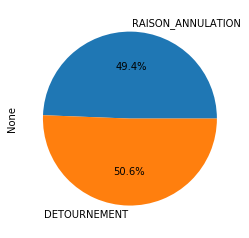

In [61]:
# si l'heure de depart n'est pas définit alors le vol a été annulé
raw_vols[raw_vols['HEURE_DEPART'].isna()]["RAISON_ANNULATION"].isna().sum()
# si l'heure de décolage n'est pas def alors le vol a aussi été annulé
raw_vols[raw_vols['HEURE_DECOLLAGE'].isna()]["RAISON_ANNULATION"].isna().sum()
# Si retard arrivé NAN alors détournement 
raw_vols[raw_vols["TEMPS_RETARD_ARRIVEE"].isna()]["DETOURNEMENT"].isna().sum()
# si l'heure d'attérisage n'est pas définit. Alors vol annulé ou détourné ! 
raw_vols[raw_vols['HEURE_ATTERRISSAGE'].isna()][["RAISON_ANNULATION","DETOURNEMENT"]].count().plot.pie(autopct='%1.1f%%')

# DETOURNEMENT et ANNULATION
print("Vol détourné : ",round((raw_vols['DETOURNEMENT'].value_counts()[1]) * 100  / raw_vols.shape[0],2),"%")
print("Vol annulé : ",round((raw_vols['ANNULATION'] == 1).sum() * 100  / raw_vols.shape[0],2),"%")

In [72]:
# dates
print(vols['DATE'].min())
print(vols['DATE'].max())

1/1/2016
9/9/2018


In [78]:
vols.head(2)

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,DATE,NIVEAU DE SECURITE,COMPAGNIE AERIENNE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2018,10,COA


count    2940415.000000
mean          17.250667
std            9.256521
min            1.000000
25%           12.000000
50%           15.000000
75%           20.000000
max          200.000000
Name: TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE, dtype: object


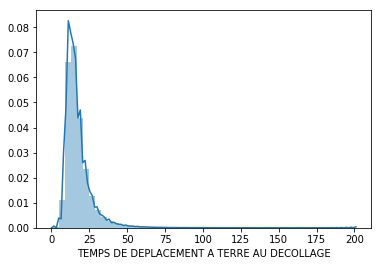

In [77]:

print(vols['TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE'].describe().apply(lambda x: format(x, 'f')))
sns.distplot(vols['TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE'])